In [1]:
import os
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import imageio.v3 as iio

In [2]:
# set constants
TRAINING_IMAGES_DIR = 'data/images/TRAIN' # directory/path to training images
TEST_IMAGES_DIR = 'data/images/TEST' # directory/path to test images
TRAINING_LABELS_PATH = 'data/labels.csv' # path to training labels csv
IMAGE_HEIGHT = 240 #pixels
IMAGE_WIDTH = 320 #pixels

# dictionaries mapping each label to an integer representation (or vice versa)
REP_TO_LABELS = {0: 'EOSINOPHIL', 1: 'LYMPHOCYTE', 2: 'MONOCYTE', 3: 'NEUTROPHIL'}
LABELS_TO_REP = {'EOSINOPHIL': 0, 'LYMPHOCYTE': 1, 'MONOCYTE': 2, 'NEUTROPHIL': 3}

In [3]:
def load_images(dir):
    """
    Loads the images at the directory path dir into an ndarray, then returns it
    with a corresponding list of training labels (from the directory name) and
    the names of the image files.

    Inputs: dir - path to image directory
    Outputs: images = ndarray of size (num images, 240, 320, 3)
             images_names = list of len (num images)
             labels = list of len (num images)
    """
    # create empty lists to store image data
    images_list = [] # ndarrays for the training images
    images_names = [] # the filename of the image
    labels = [] # the true label for the image

    # loop through directory:
    for dirpath, dirnames, filenames in os.walk(dir):
        for file in filenames:
            images_list.append(iio.imread(uri = os.path.join(dirpath, file)).astype(np.uint8))
            images_names.append(file)
            # assign the image a rep based on the directory it lies in
            labels.append(LABELS_TO_REP[Path(dirpath).stem])

    # stack all images into one array and normalize values to [0,1]
    images = np.stack(images_list, axis=0)/255

    return images, images_names, labels

In [4]:
# load training images and labels
train_images, train_images_names, train_labels = load_images(TRAINING_IMAGES_DIR)

In [5]:
# load test images and labels
# test_images, test_images_names, test_labels = load_images(TEST_IMAGES_DIR)

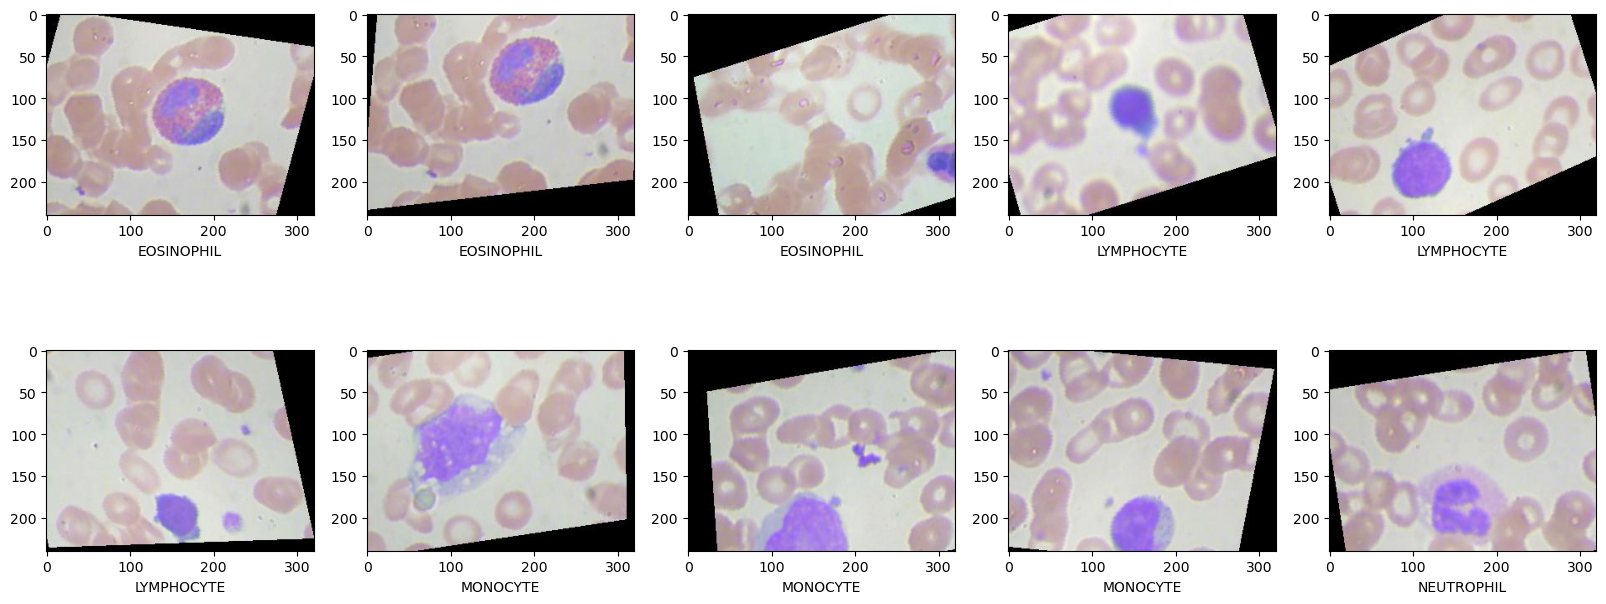

In [6]:
# display 10 cell images
fig, axs = plt.subplots(2, 5, figsize=(20,8))
count = 0
for i in range(2):
    for j in range(5):
        axs[i,j].imshow(train_images[850*count,:,:,:].reshape([IMAGE_HEIGHT,IMAGE_WIDTH,3]))
        # axs[i,j].axis("off")
        axs[i,j].set_xlabel(REP_TO_LABELS[train_labels[850*count]])
        count+=1
plt.show()